In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from scipy.stats import binned_statistic_2d

from astropy.visualization import simple_norm

1.2987012987012987
5.714285714285714 3.6363636363636362


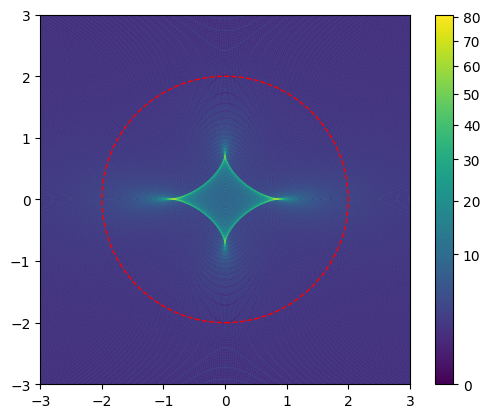

In [14]:
theta_E = 2.0
kappa = 0.2/theta_E
gamma = 0.2
size = 1000
mu = 1.0/abs((1.0-kappa)**2-gamma**2)
print(mu)
range_x = 4 * mu * abs(1.0 - kappa + gamma)
range_y = 4 * mu * abs(1.0 - kappa - gamma)
print(range_x, range_y)

# nx, ny = 1000, 1000
# image_range = 5
image_range_x = (-range_x, range_x)
image_range_y = (-range_y, range_y)

theta_x = np.linspace(*image_range_x, size)
theta_y = np.linspace(*image_range_y, size)
theta_x, theta_y = np.meshgrid(theta_x, theta_y)
theta_square = theta_x**2 + theta_y**2

beta_x = theta_x - ((theta_E**2 * theta_x) / theta_square + gamma * theta_x)
beta_y = theta_y - ((theta_E**2 * theta_y) / theta_square - gamma * theta_y)

magnification_map, x_edges, y_edges, _ = binned_statistic_2d(
        beta_x.flatten(), 
        beta_y.flatten(), 
        np.ones_like(beta_x).flatten(), 
        statistic='sum', 
        bins=size // 2, 
        range=((-3, 3), (-3, 3)),
        expand_binnumbers=True)
# hist, bin_edges_x, bin_edges_y = np.histogram2d(
#     beta_x.flatten(), beta_y.flatten(), 
#     bins=1000, 
#     range=((-100, 100), (-100, 100))
#     )
# image = hist.T

image = magnification_map
cb = plt.imshow(image, origin='lower', norm=simple_norm(image, stretch='sqrt'),
                extent=(x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]))
plt.colorbar(cb)
e = Ellipse(xy=(0, 0), width=2*theta_E, height=2*theta_E, edgecolor='r', fc='None', lw=1, ls='--')
plt.gca().add_patch(e)
# plt.xlim(-range_x, range_x)

plt.show()

In [ ]:
nx, ny = 1000, 1000
image_range = 5
image_range_x = (-image_range, image_range)
image_range_y = (-image_range, image_range)

theta_x = np.linspace(*image_range_x, nx)
theta_y = np.linspace(*image_range_y, ny)
theta_x, theta_y = np.meshgrid(theta_x, theta_y)
theta_square = theta_x**2 + theta_y**2

theta_E = 10
gamma = 0.5
beta_x = theta_x - ((theta_E**2 * theta_x) / theta_square + gamma * theta_x)
beta_y = theta_y - (theta_E**2 * theta_y) / theta_square - gamma * theta_y)

magnification_map, x_edges, y_edges, _ = binned_statistic_2d(
        beta_x.flatten(), 
        beta_y.flatten(), 
        np.ones_like(beta_x).flatten(), 
        statistic='sum', 
        bins=1000, 
        range=((-100, 100), (-100, 100)),
        expand_binnumbers=True)
# hist, bin_edges_x, bin_edges_y = np.histogram2d(
#     beta_x.flatten(), beta_y.flatten(), 
#     bins=1000, 
#     range=((-100, 100), (-100, 100))
#     )
# image = hist.T
image = magnification_map.T
cb = plt.imshow(image, origin='lower', norm=simple_norm(image, stretch='sqrt'))
plt.colorbar(cb)
plt.show()